<a href="https://colab.research.google.com/github/unknown-jun/Face_Recognition/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# face_recognition tutorial

In [41]:
pip install opencv-python

In [65]:
!wget https://karlmaslo.pe/adminkarl/resources/assets/image/noticia/1539291794-9nqiy4-bill-gates-vs-steve-jobs.jpg
!wget https://deadline.com/wp-content/uploads/2018/02/bill-gates-2.jpg
!wget https://www.incimages.com/uploaded_files/image/1920x1080/getty_96211512_200014742000928041_418201.jpg

--2021-05-01 13:41:14--  https://www.incimages.com/uploaded_files/image/1920x1080/getty_96211512_200014742000928041_418201.jpg
Resolving www.incimages.com (www.incimages.com)... 151.101.2.59, 151.101.66.59, 151.101.130.59, ...
Connecting to www.incimages.com (www.incimages.com)|151.101.2.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153990 (150K) [image/jpeg]
Saving to: ‘getty_96211512_200014742000928041_418201.jpg’

getty_96211512_2000 100%[===================>] 150.38K  --.-KB/s    in 0.002s  

2021-05-01 13:41:14 (58.8 MB/s) - ‘getty_96211512_200014742000928041_418201.jpg’ saved [153990/153990]



In [48]:
import face_recognition

image = face_recognition.load_image_file('/content/black-4906807_1280.jpg') # 사진을 로드한다
locations = face_recognition.face_locations(image)  # 사진에서 얼굴을 찾아 array의 형태로 반환

print(len(locations))   # 사람이 몇명인지 알수 있음 (array가 위치를 표현해주니깐 그게 2개가 있다는 소리)
print(f'이 사진에 {len(locations)} 명이 있습니다')
locations               # 얼굴위치에 대한 정보를 numpy array형태로 보여줌

2
이 사진에 2 명이 있습니다


[(315, 643, 405, 554), (305, 1181, 395, 1091)]

## 다른 사진과 또다른 사진을 비교하여 같은 사람인지를 맞추기

In [47]:
image_of_obama1 = face_recognition.load_image_file('/content/obama1.jpg')
obama1_encoding = face_recognition.face_encodings(image_of_obama1)[0]        # 얼굴에 대한 정보를 128차원의 array형태로 알려줌

image_of_black_people = face_recognition.load_image_file('/content/obama2.jpg')
obama2_encoding = face_recognition.face_encodings(image_of_black_people)[0]      # 비교대상군 사진의 128차원 array

image_of_black_people2 = face_recognition.load_image_file('/content/stranger.jpg')
stranger_encording = face_recognition.face_encodings(image_of_black_people2)[0]  # 비교대상군 사진의 128차원 array

# 얼굴을 비교하기
results = face_recognition.compare_faces([obama1_encoding], obama2_encoding)

if results[0]:
    print('이 사람은 오바마 입니다.')
else:
    print('이 사람은 오바마가 아닙니다.')

# 다른 사람의 얼굴 비교하기
results2 = face_recognition.compare_faces([obama1_encoding], stranger_encording)

if results2[0]:
    print('이 사람은 오바마 입니다.')
else:
    print('이 사람은 오바마가 아닙니다.')

이 사람은 오바마 입니다.
이 사람은 오바마가 아닙니다.


## 얼굴 사진을 크롭해서 가져오고 파일로 저장하기

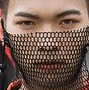

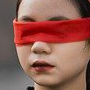

In [60]:
import face_recognition
from PIL import Image  # 이미지를 크롭해서 가져오기 위한 라이브러리
from IPython.display import Image as Pymage   # colab 상에서 이미지를 불러오기 위한 라이브러리

image = face_recognition.load_image_file('/content/black-4906807_1280.jpg') # 사진을 로드한다
locations = face_recognition.face_locations(image)  # 사진에서 얼굴을 찾아 array의 형태로 반환

for face_location in locations:  # loop문을 돌아서 사진상에 모든 얼굴을 불러들임
    top, right, bottom, left = face_location  # 사진 안에서 모든 얼굴에 대한 위치 좌표값들을 각각의 변수에 담음

    face_image = image[top:bottom, left:right] 
    pil_image = Image.fromarray(face_image)  # face_image 변수에 담긴 위치 정보를 토대로 사진을 사각형으로 잘라냄  
    display(pil_image)  # 결과창에 띄움
    pil_image.save(f'{top}.jpg')  # 얼굴 사진들을 저장함

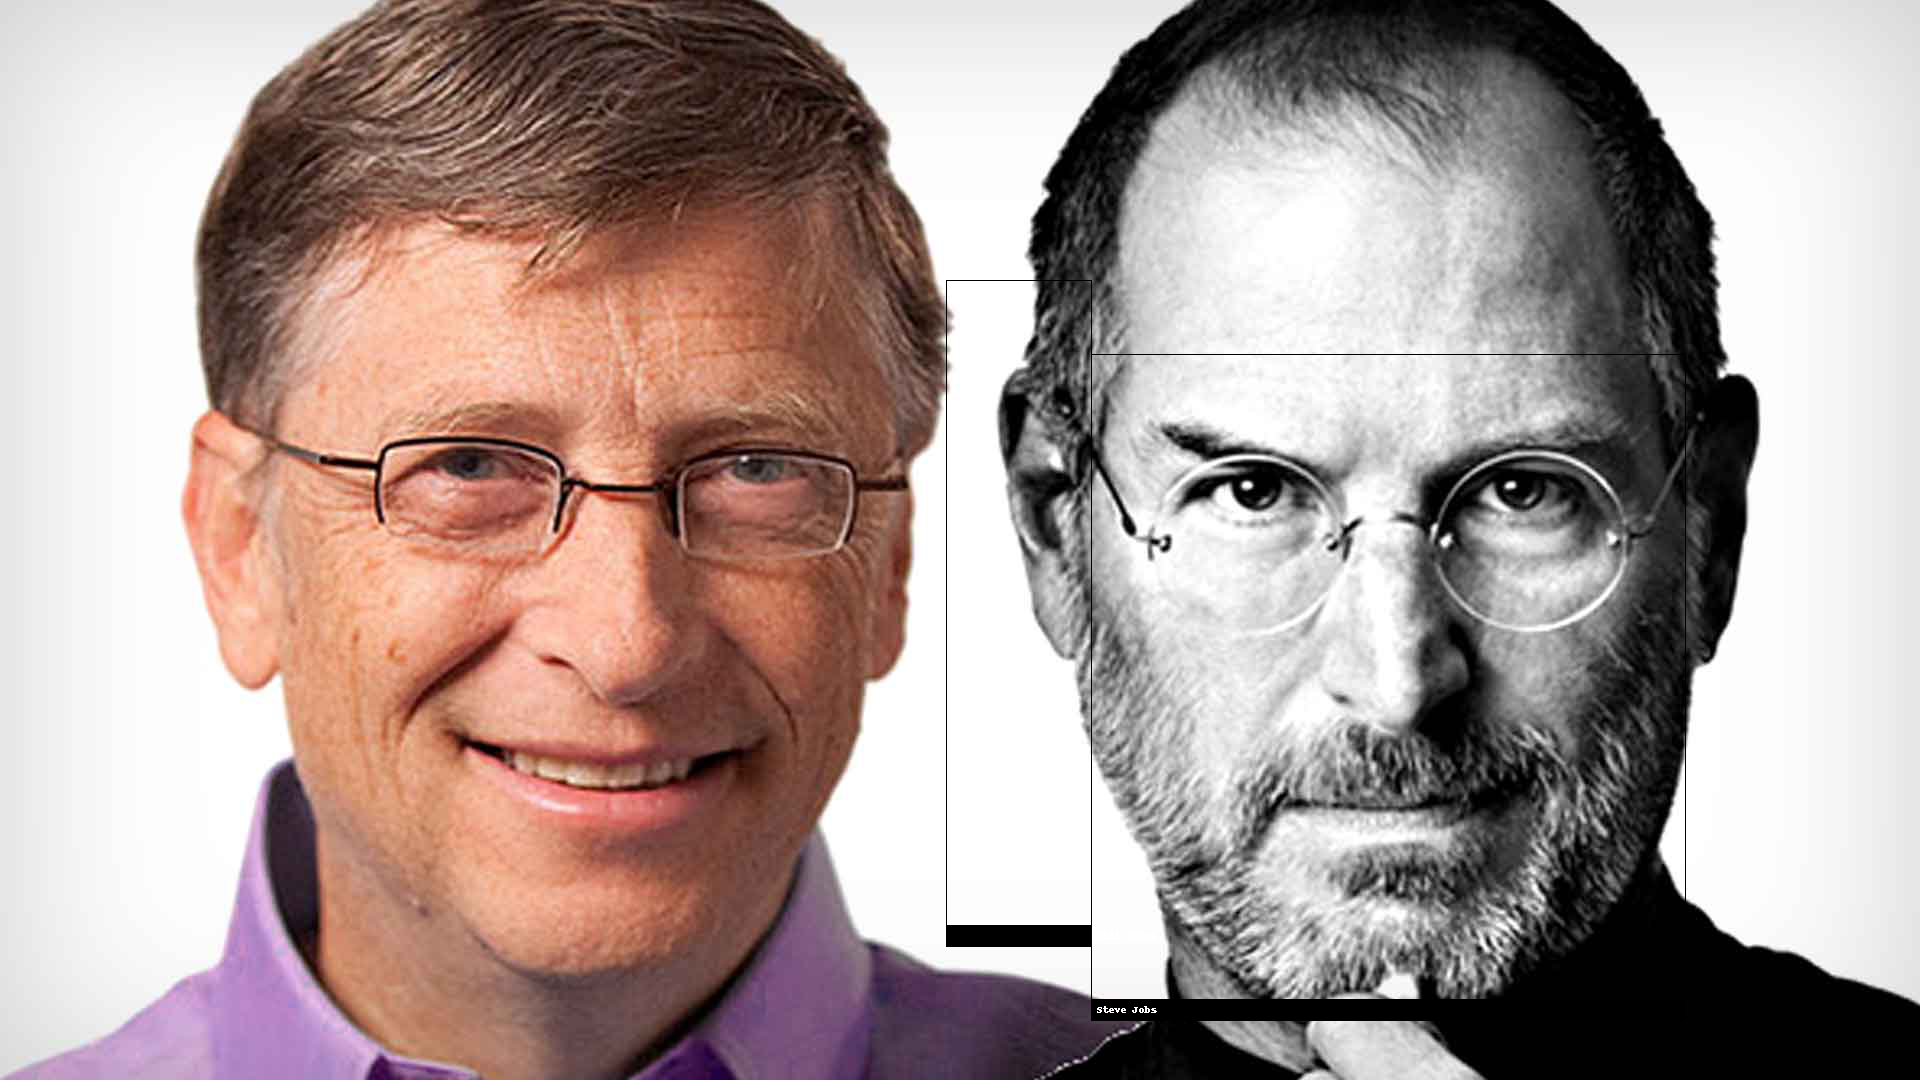

In [70]:
import face_recognition
from PIL import Image, ImageDraw
from IPython.display import Image as Pymage

image_of_bill = face_recognition.load_image_file('/content/bill-gates-2.jpg')
bill_face_encoding = face_recognition.face_encodings(image_of_bill)[0]

image_of_steve = face_recognition.load_image_file('/content/getty_96211512_200014742000928041_418201.jpg')
steve_face_encoding = face_recognition.face_encodings(image_of_steve)[0]

# encoding과 이름들의 array 생성하기
known_face_encoding = [
                       bill_face_encoding,
                       steve_face_encoding  ]
known_face_names = [
                    "Bill Gates",
                    "Steve Jobs"   ]

# 얼굴을 찾기 위한 test image 파일을 로드하기
test_image = face_recognition.load_image_file('/content/1539291794-9nqiy4-bill-gates-vs-steve-jobs.jpg')

# test image에서 얼굴 찾기
test_location = face_recognition.face_locations(test_image)
test_encoding = face_recognition.face_encodings(test_image, test_location)

# PIL 포멧으로 바꾸기
pil_image2 = Image.fromarray(test_image)

# ImageDraw 인스턴스 생성
draw = ImageDraw.Draw(pil_image2)

# test image에서 얼굴을 loop문으로 찾는다
for(top, right, bottom, loft), test_encoding in zip(test_location, test_encoding):
    matches = face_recognition.compare_faces(known_face_encoding, test_encoding)

    name = "Unknown Person"
    # 만약 사진이 일치한다면
    if True in matches:
        first_match_index = matches.index(True)
        name = known_face_names[first_match_index]

    # 네모를 그린다.
    draw.rectangle(((left, top), (right, bottom)), outline=(0,0,0))

    # 이름을 표시한다.
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0,0,0), outline=(0,0,0))
    draw.text((left +6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

del draw

display(pil_image2)